In [2]:
import tensorlayer as tl
import tensorflow as tf
from model import SRGAN_g
from main import preprocess, preprocess_any
from utils import get_imgs_fn, get_file_list
import numpy as np

from pylab import cm

from matplotlib import pyplot as plt

from skimage.measure import compare_ssim, compare_psnr
import time

def open_rgb(fname):
    import cv2
    return cv2.imread(fname).astype('float32')


def filter_files(flist, keywords):
    return [f for f in flist if all(s in f for s in keywords)]


import imageio

In [3]:
def rmse_f(x, y):
    return np.sqrt(((x - y)*(x - y)).mean())
def norm_max(img):
    return (img - img.min())/(img.max() - img.min())

In [4]:
tf.reset_default_graph()

checkpoint_dir = "checkpoint"  # checkpoint_resize_conv
#checkpoint_dir = 'D:/YandexDisk/korinevskaya-gtx1080/depth_srgan/checkpoint'

small_size =[38,64] #[187, 225] #synthia
big_size = [304,512]#[1496, 1800] #SR synthia

In [5]:
tf.reset_default_graph()
t_input = tf.placeholder(tf.float32, shape=(None, None, None, 1), name='t_input')
d_flg = tf.placeholder(tf.bool, name = 'is_train')

t_image, t_target_image, t_interpolated = preprocess_any(t_input, small_size, big_size)

net_g_outputs = SRGAN_g(t_image, t_interpolated, is_train=d_flg, reuse=False)

>>>>>>>>>>>>>>>>>>>>> (?, 304, 512, 1)


(760, 1280, 1) float32 1.65 3.927701 4.6


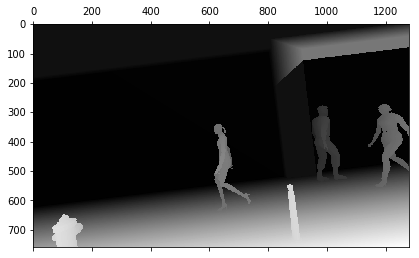

In [6]:
img = 'D:/Alice/Documents/depth_datasets/SYNTHIA/SYNTHIA-SEQS-05-SPRING/Depth/Stereo_Left/Omni_L/000196.png'
dimg = get_imgs_fn(img)

plt.matshow(np.log(dimg[:,:,0]), cmap=cm.gray_r)

print_props = lambda x: print(x.shape, x.dtype, np.min(x), np.mean(x), np.max(x))

print_props(dimg)


In [7]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir+'/g_init'))
#saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir+'/gan'))
#saver.restore(sess, 'D:/Alice/OneDrive/code2/depth_srgan/checkpoint/g_init/model32.ckpt')

INFO:tensorflow:Restoring parameters from checkpoint/g_init\model1.ckpt


[TL] Restoring parameters from checkpoint/g_init\model1.ckpt


NotFoundError: Key G_Depth_SR/convolution_0/Conv/BatchNorm/moving_mean not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "D:\Python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Python36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\Python36\lib\site-packages\tornado\platform\asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "D:\Python36\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "D:\Python36\lib\asyncio\base_events.py", line 1431, in _run_once
    handle._run()
  File "D:\Python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\Python36\lib\site-packages\tornado\platform\asyncio.py", line 102, in _handle_events
    handler_func(fileobj, events)
  File "D:\Python36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "D:\Python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\Python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "D:\Python36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Python36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\Python36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\Python36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\Python36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Python36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Python36\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Python36\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\Python36\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-7302864ff915>", line 2, in <module>
    saver = tf.train.Saver()
  File "D:\Python36\lib\site-packages\tensorflow\python\training\saver.py", line 1293, in __init__
    self.build()
  File "D:\Python36\lib\site-packages\tensorflow\python\training\saver.py", line 1302, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "D:\Python36\lib\site-packages\tensorflow\python\training\saver.py", line 1339, in _build
    build_save=build_save, build_restore=build_restore)
  File "D:\Python36\lib\site-packages\tensorflow\python\training\saver.py", line 796, in _build_internal
    restore_sequentially, reshape)
  File "D:\Python36\lib\site-packages\tensorflow\python\training\saver.py", line 449, in _AddRestoreOps
    restore_sequentially)
  File "D:\Python36\lib\site-packages\tensorflow\python\training\saver.py", line 847, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "D:\Python36\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1113, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "D:\Python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "D:\Python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3271, in create_op
    op_def=op_def)
  File "D:\Python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key G_Depth_SR/convolution_0/Conv/BatchNorm/moving_mean not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


In [34]:
small_img, gt, interpolated, result = sess.run([t_image, t_target_image, t_interpolated, net_g_outputs], feed_dict={t_input: np.log(dimg[None,...]), d_flg:False})

(1, 38, 64, 1) float32 -0.94819695 0.632622 0.9795139
(1, 304, 512, 1) float32 -0.98821336 0.6343819 1.0


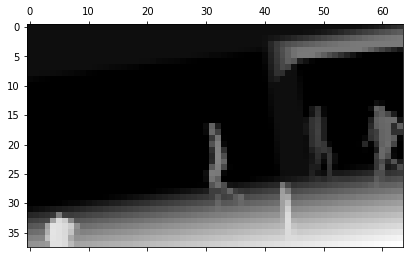

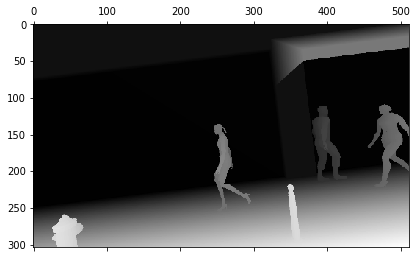

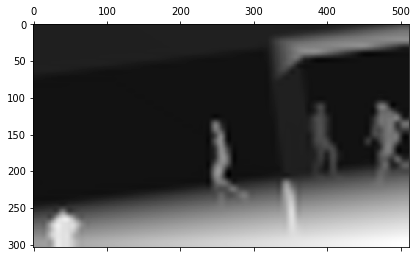

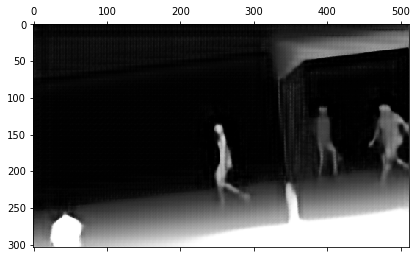

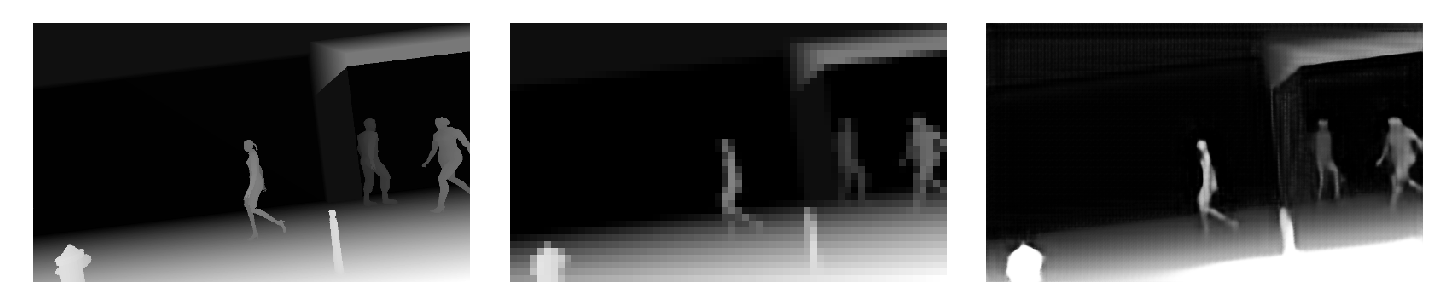

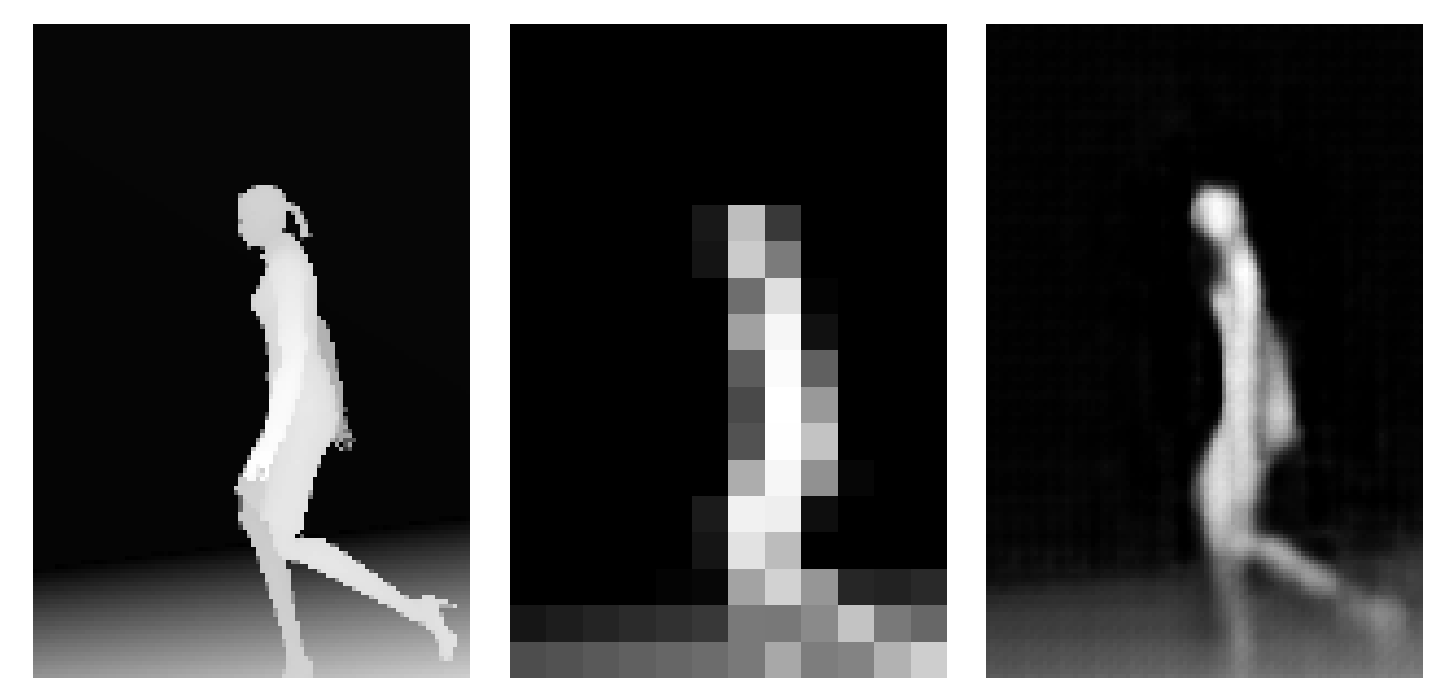

In [45]:
print_props(small_img)
plt.matshow(small_img[0,:,:,0], cmap=cm.gray_r)



plt.figure()

print_props(gt)
plt.matshow((gt[0,:,:,0]), cmap=cm.gray_r)
plt.figure()




plt.matshow(interpolated[0,:,:,0], cmap=cm.gray_r)
plt.figure()


plt.matshow(((result[0,:,:,0])), cmap=cm.gray_r)
plt.figure()


fig, ax = plt.subplots(1,3,figsize = (20,20))
ax[0].matshow((gt[0,:,:,0]), cmap=cm.gray_r), ax[0].axis('off') 
ax[1].matshow(small_img[0,:,:,0], cmap=cm.gray_r), ax[1].axis('off')
ax[2].matshow(((result[0,:,:,0])), cmap=cm.gray_r),ax[2].axis('off') 
fig.tight_layout()
plt.savefig('compare_synthia.png')


fig, ax = plt.subplots(1,3,figsize = (20,20))
ax[0].matshow((gt[0,100:250,200:300,0]), cmap=cm.gray_r), ax[0].axis('off') 
ax[1].matshow(small_img[0,12:30,25:37,0], cmap=cm.gray_r), ax[1].axis('off')
ax[2].matshow(((result[0,100:250,200:300,0])), cmap=cm.gray_r),ax[2].axis('off') 
fig.tight_layout()
plt.savefig('compare_synthia_2.png')

In [86]:


g = norm_max(gt[0,:,:,0])
r = norm_max(result[0,:,:,0])

print(rmse_f(g * 255, r * 255))

15.0674305


(1920, 2780) float32 71.79539 19020.629 54258.367


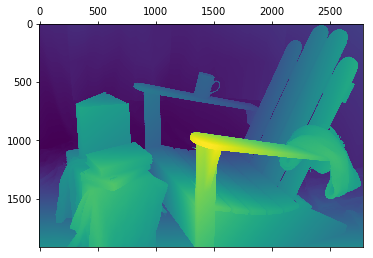

In [88]:
import cv2

def load_pfm(fname):
    import re
    color = None
    width = None
    height = None
    scale = None
    endian = None
    with open(fname, mode='rb') as file:
        header = file.readline().rstrip().decode('ascii')
        if header == 'PF':
            color = True    
        elif header == 'Pf':
            color = False
        else:
            raise Exception('Not a PFM file.')
        dim_match = re.match(r'^(\d+)\s(\d+)\s$', file.readline().decode('ascii'))
        if dim_match:
            width, height = map(int, dim_match.groups())
        else:
            raise Exception('Malformed PFM header.')
        scale = float(file.readline().rstrip().decode('ascii'))
        if scale < 0: # little-endian
            endian = '<'
            scale = -scale
        else:
            endian = '>' # big-endian
        data = np.fromfile(file, endian + 'f')
        shape = (height, width, 3) if color else (height, width)
        return np.reshape(data, shape)[::-1, :], scale
    
def open_middlebury_disp(fname):
    d, _ = load_pfm(fname)
    mask = np.isinf(d)
    min_d = d.min()
    max_d = d[np.logical_not(mask)].max()
    d = (d - min_d) / (max_d - min_d) * 255
    d[mask] = np.zeros_like(d)[mask]
    idx = np.where(d == 0)
    d_b = cv2.medianBlur(d.astype(np.uint8), 155)
    d[idx] = d_b[idx]
    d = cv2.resize(d, (2780, 1920))
    d = d.astype(np.float32) * (max_d - min_d) + min_d
    return d

d = open_middlebury_disp('D:/Alice/Documents/depth_datasets/Middlebury - Copy/scenes2014/Adirondack-perfect/disp0.pfm')
plt.matshow(d)
print_props(d)


In [89]:
small_img, gt, interpolated, result = sess.run([t_image, t_target_image, t_interpolated, net_g_outputs], feed_dict={t_input: (d[None,...,None]), d_flg:False})

(1, 38, 64, 1) float32 -0.9964553 -0.30060768 0.9851899
(1, 304, 512, 1) float32 -0.999885 -0.3018401 0.99997866
(1, 304, 512, 1) float32 -0.999885 -0.3018401 0.99997866
(1, 304, 512, 1) float32 -0.999885 -0.3018401 0.99997866


NameError: name 'rmse' is not defined

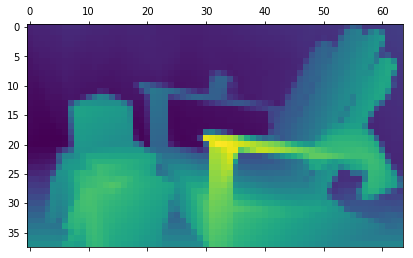

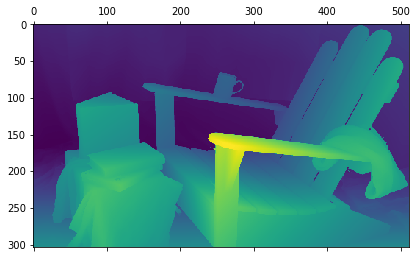

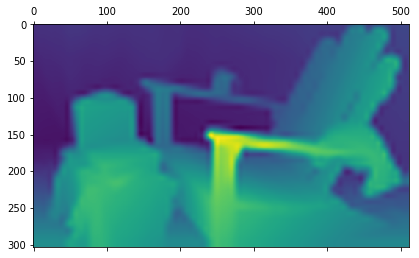

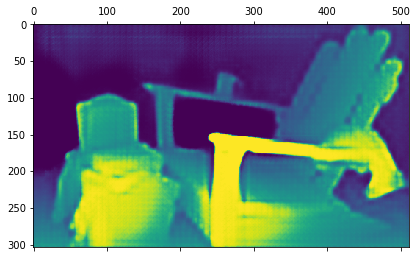

In [90]:
print_props(small_img)
plt.matshow(small_img[0,:,:,0])
plt.figure()

print_props(gt)
plt.matshow(gt[0,:,:,0])
plt.figure()

print_props(gt)
plt.matshow(interpolated[0,:,:,0])
plt.figure()

print_props(gt)
plt.matshow((((result[0,:,:,0]))))
plt.figure()

g = norm_max(gt[0,:,:,0])
r = norm_max(result[0,:,:,0])

print(rmse(g * 255, r * 255))

In [175]:
def get_small_big_sizes(shape):
    big_size = shape[1:3]
    small_size = (np.floor(np.array(big_size)/8)).astype(int)
    big_size = small_size*8
    return list(small_size), list(big_size)

0.48641694 39.144535 (1, 436, 1024, 1)
[54, 128] [432, 1024]


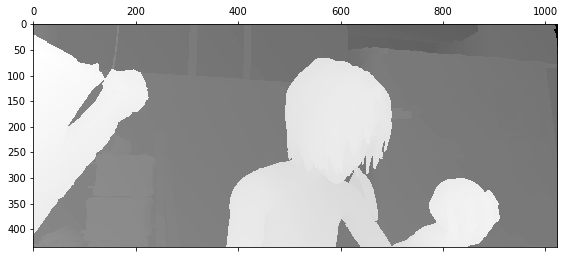

In [177]:
from sintel_io import depth_read

sintel_depth = sorted(get_file_list('D:/Alice/Documents/depth_datasets/sintel-depth/training/depth/'))
sintel_rgb = sorted(get_file_list('D:/Alice/Documents/depth_datasets/MPI-Sintel-complete/training/final/'))


sintel_seqs = ['alley','ambush', 'market','bandage','cave']

def sintel_iter(rgb, depth, bs=5):
    for i in range(0, len(depth), bs):
        b_r = rgb[i:i + bs]
        b_d = depth[i:i + bs]
        depths = ((np.concatenate([depth_read(d)[None,:,:,None] for d in b_d])))
        rgbs = np.concatenate([open_rgb(r)[None,:,:] for r in b_r])
        yield rgbs, depths
        
test_sin_d  = depth_read(sintel_depth[0])[None,:,:, None]
test_sin_rgb  = open_rgb(sintel_rgb[0])[None,:,:, None]
print(test_sin_d.min(), test_sin_d.max(),test_sin_d.shape )


small_size, big_size = get_small_big_sizes(test_sin_d.shape)
print(small_size, big_size)

plt.matshow(np.log(depth_read(sintel_depth[0])), cmap=cm.gray_r)

In [178]:
tf.reset_default_graph()

#checkpoint_dir = "checkpoint"  # checkpoint_resize_conv
checkpoint_dir = 'D:/YandexDisk/korinevskaya-gtx1080/depth_srgan/checkpoint'

t_input = tf.placeholder(tf.float32, shape=(None, None, None, 1), name='t_input')
d_flg = tf.placeholder(tf.bool, name = 'is_train')

t_image, t_target_image, t_interpolated = preprocess_any(t_input, small_size, big_size)

net_g_outputs = SRGAN_g(t_image, t_interpolated, is_train=d_flg, reuse=False)

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir+'/g_init'))
#saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir+'/gan'))

INFO:tensorflow:Restoring parameters from D:/YandexDisk/korinevskaya-gtx1080/depth_srgan/checkpoint/g_init\model13.ckpt


[TL] Restoring parameters from D:/YandexDisk/korinevskaya-gtx1080/depth_srgan/checkpoint/g_init\model13.ckpt


In [185]:
from tqdm import tqdm


def test_sintel(sintel_depth, sintel_rgb, save = False):
    phead,ptail = os.path.split(sintel_depth[0])
    
    newp = phead + '/'
    print(ptail)
    
    
    bs = 1
    total = int(np.floor(len(sintel_depth)/bs))
    rmse = []
    ssim = []
    psnr = []
    times = []
    
    rmse_interp = []
    ssim_interp = []
    psnr_interp = []
    
    for xb, yb in tqdm(sintel_iter(sintel_rgb, sintel_depth, bs = bs), total=total):
        time_start = time.time()
        yb_big, interp, out = sess.run([t_target_image, t_interpolated, net_g_outputs], feed_dict={t_input:yb, d_flg:False})
        times.append((time.time() - time_start)/bs)
        
        #plt.figure()
        #plt.matshow(yb_big[0,:,:,0])
        #plt.figure()
        plt.matshow(out[0,:,:,0])
        plt.figure()
        plt.matshow(interp[0,:,:,0])
        
        score_rms = 0
        score_ssim = 0
        score_psnr = 0
        
        iscore_rms = 0
        iscore_ssim = 0
        iscore_psnr = 0
        
        for i in range(len(out)):
            out_norm = norm_max(out[i,:,:,0])
            yb_norm = norm_max(yb_big[i,:,:,0])
            interp_norm = norm_max(interp[i,:,:,0])
            
            temp = (out_norm * 255).astype('uint8')
            temp2 = (yb_norm * 255).astype('uint8')
            temp3 = (interp_norm * 255).astype('uint8')

            #score_rms += rmse_f(out_norm * 255, yb_norm * 255)
            score_rms += rmse_f(temp, temp2)
            score_ssim += compare_ssim(yb_norm, out_norm)
            score_psnr += compare_psnr(out_norm, yb_norm, data_range = 1)
            
            iscore_rms += rmse_f(temp3,temp2)
            iscore_ssim += compare_ssim(interp_norm, yb_norm)
            iscore_psnr += compare_psnr(interp_norm, yb_norm, data_range = 1)
            break
        
        score_rms /= len(out)
        score_ssim /= len(out)
        score_psnr /= len(out)
        
        iscore_rms /= len(out)
        iscore_ssim /= len(out)
        iscore_psnr /= len(out)
        
        ssim.append(score_ssim)
        rmse.append(score_rms)
        psnr.append(score_psnr)
        
        ssim_interp.append(iscore_ssim)
        rmse_interp.append(iscore_rms)
        psnr_interp.append(iscore_psnr)
        
        if save:
            imageio.imwrite(newp+ 'nn.png', temp)
        return



    print(np.mean(rmse))
    print(np.mean(ssim))
    print(np.mean(psnr))
    print(np.mean(times))
    
    print('Interpolation:')
    print(np.mean(rmse_interp))
    print(np.mean(ssim_interp))
    print(np.mean(psnr_interp))

[54, 128] [432, 1024]
sequence =  alley
Len =  100
frame_0001.dpt


  0%|                                                  | 0/100 [00:00<?, ?it/s]


sequence =  ambush
Len =  374
frame_0001.dpt


  0%|                                                  | 0/374 [00:00<?, ?it/s]


sequence =  market
Len =  140
frame_0001.dpt


  0%|                                                  | 0/140 [00:00<?, ?it/s]


sequence =  bandage
Len =  374
frame_0001.dpt


  0%|                                                  | 0/374 [00:00<?, ?it/s]


sequence =  cave
Len =  100
frame_0001.dpt


  0%|                                                  | 0/100 [00:00<?, ?it/s]


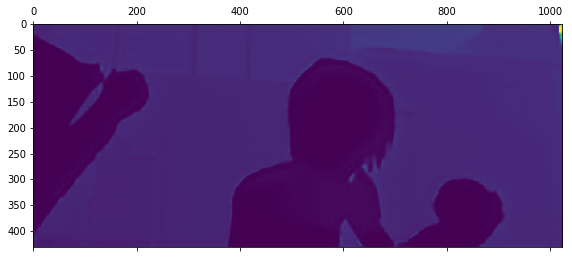

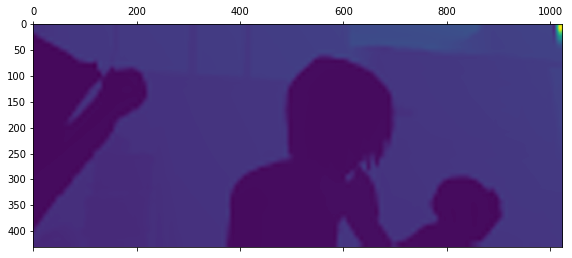

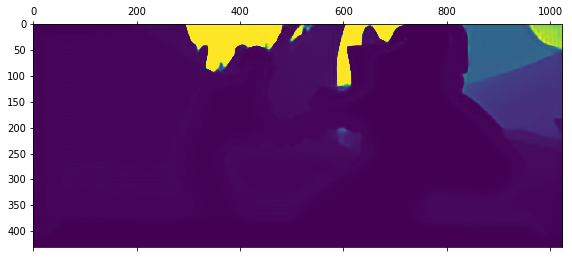

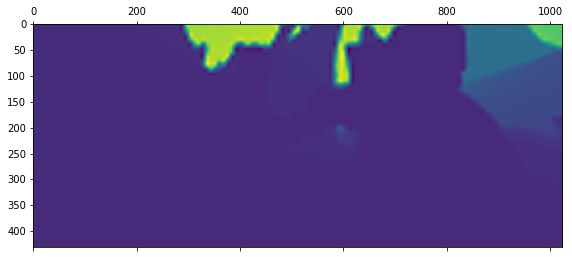

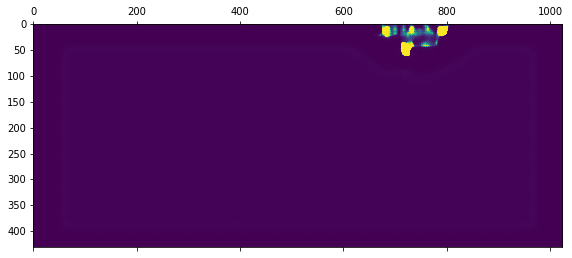

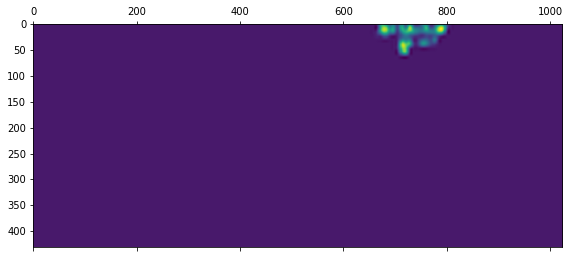

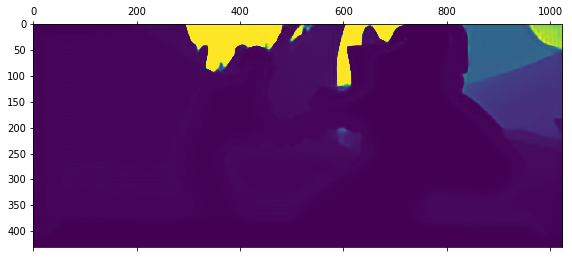

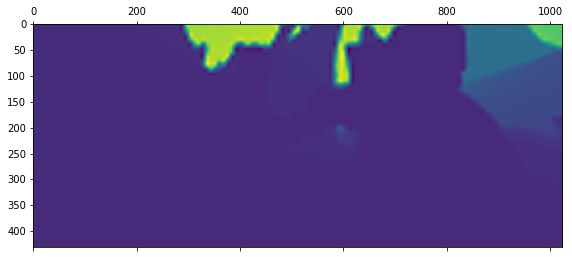

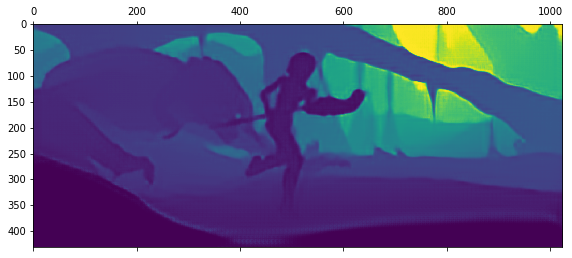

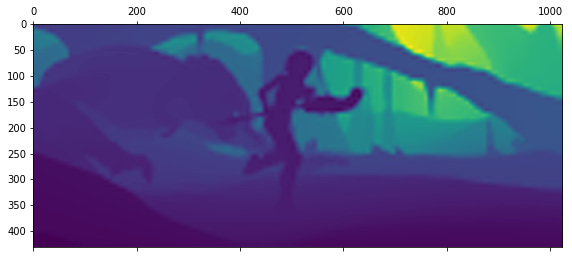

In [186]:
print(small_size, big_size)

for s in sintel_seqs:
    print('sequence = ', s)
    files_d = filter_files(sintel_depth, s)
    files_rgb = filter_files(sintel_rgb, s)
    print('Len = ', len(files_d) )
    if s=='cave':
        test_sintel(files_d , files_rgb, save = True)
    else:
        test_sintel(files_d , files_rgb, save = False)
    

In [49]:
import cv2

mid = 'D:/Alice/Documents/depth_datasets/Middlebury/'

cones = mid+'cones/disp2.pgm'
teddy = mid+'teddy/disp2.pgm'
tsukuba = mid+'tsukuba/truedisp.row3.col3.pgm'
venus = mid+'venus/disp2.pgm'
art = mid+'art/disp0GT.pfm'

middle = [cones,teddy,tsukuba,venus,art]

(1920, 2780)
[960, 1390]


NameError: name 'get_small_big_sizes' is not defined

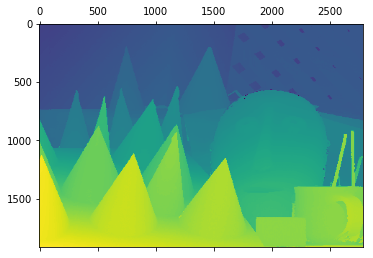

In [50]:
def load_pgm(pgmf):
    d = cv2.imread(pgmf,flags=cv2.IMREAD_ANYDEPTH).astype('float32')
    return d

def load_pfm(fname):
    import re
    color = None
    width = None
    height = None
    scale = None
    endian = None
    with open(fname, mode='rb') as file:
        header = file.readline().rstrip().decode('ascii')
        if header == 'PF':
            color = True    
        elif header == 'Pf':
            color = False
        else:
            raise Exception('Not a PFM file.')
        dim_match = re.match(r'^(\d+)\s(\d+)\s$', file.readline().decode('ascii'))
        if dim_match:
            width, height = map(int, dim_match.groups())
        else:
            raise Exception('Malformed PFM header.')
        scale = float(file.readline().rstrip().decode('ascii'))
        if scale < 0: # little-endian
            endian = '<'
            scale = -scale
        else:
            endian = '>' # big-endian
        data = np.fromfile(file, endian + 'f')
        shape = (height, width, 3) if color else (height, width)
        return np.reshape(data, shape)[::-1, :], scale
    
def open_middlebury_disp(fname, pfm = True):
    if pfm:
        d, _ = load_pfm(fname)
    else:
        d = load_pgm(fname)
            
    mask = np.isinf(d)
    min_d = d.min()
    max_d = d[np.logical_not(mask)].max()
    d = (d - min_d) / (max_d - min_d) * 255
    d[mask] = np.zeros_like(d)[mask]
    idx = np.where(d == 0)
    d_b = cv2.medianBlur(d.astype(np.uint8), 155)
    d[idx] = d_b[idx]
    d = cv2.resize(d, (2780, 1920))
    d = d.astype(np.float32) * (max_d - min_d) + min_d
    return d

d = open_middlebury_disp(cones, pfm = False)
print(d.shape)
plt.matshow(d)

d_shape2 = list((np.array(d.shape)/2).astype('int'))
print(d_shape2)

small_size, big_size = get_small_big_sizes([1, *d_shape2,1])
print(small_size, big_size)

In [51]:
tf.reset_default_graph()

#checkpoint_dir = "checkpoint"  # checkpoint_resize_conv
checkpoint_dir = 'D:/YandexDisk/korinevskaya-gtx1080/depth_srgan/checkpoint'

t_input = tf.placeholder(tf.float32, shape=(None, None, None, 1), name='t_input')
d_flg = tf.placeholder(tf.bool, name = 'is_train')

t_image, t_target_image, t_interpolated = preprocess_any(t_input, small_size, big_size)

net_g_outputs = SRGAN_g(t_image, t_interpolated, is_train=d_flg, reuse=False)

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir+'/g_init'))
#saver.restore(sess, tf.train.latest_checkpoint('D:/Alice/OneDrive/code2/depth_srgan/checkpoint/g_init'))
#saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir+'/gan'))

INFO:tensorflow:Restoring parameters from D:/YandexDisk/korinevskaya-gtx1080/depth_srgan/checkpoint/g_init\model13.ckpt


[TL] Restoring parameters from D:/YandexDisk/korinevskaya-gtx1080/depth_srgan/checkpoint/g_init\model13.ckpt


D:/Alice/Documents/depth_datasets/Middlebury/cones/
0.06500387191772461
(304, 512) (304, 512)
D:/Alice/Documents/depth_datasets/Middlebury/cones
rmse =  9.474784207201044
ssim= 0.7240212037159262
psnr =  19.23975785424955
10.547076326051183
0.752644819503288
19.005166403819103
D:/Alice/Documents/depth_datasets/Middlebury/teddy/
0.03500199317932129
(304, 512) (304, 512)
D:/Alice/Documents/depth_datasets/Middlebury/teddy
rmse =  6.965179803693484
ssim= 0.7354920801564988
psnr =  19.88245208876757
10.480271853288551
0.762580093840735
21.763225132717437
D:/Alice/Documents/depth_datasets/Middlebury/tsukuba/
0.034001827239990234
(304, 512) (304, 512)
D:/Alice/Documents/depth_datasets/Middlebury/tsukuba/truedisp.row
rmse =  8.298266792150073
ssim= 0.8182893967148807
psnr =  22.558993950346157
7.609670084384365
0.6492131634775551
20.41185033341715
D:/Alice/Documents/depth_datasets/Middlebury/venus/
0.04100227355957031
(304, 512) (304, 512)
D:/Alice/Documents/depth_datasets/Middlebury/venus
rms

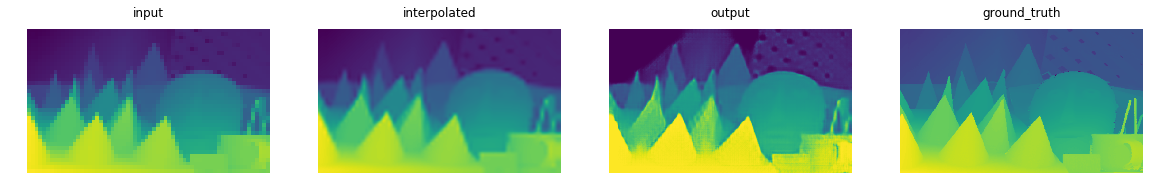

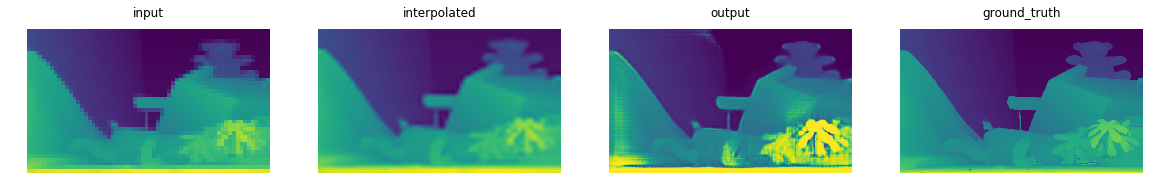

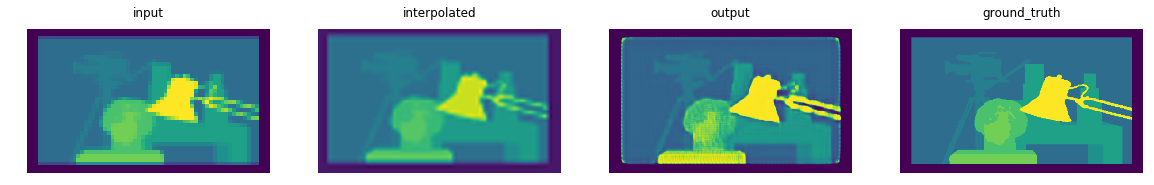

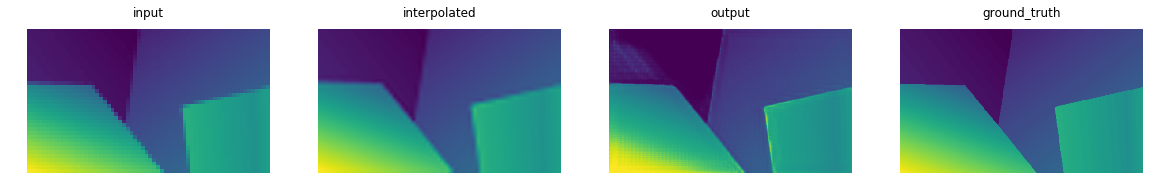

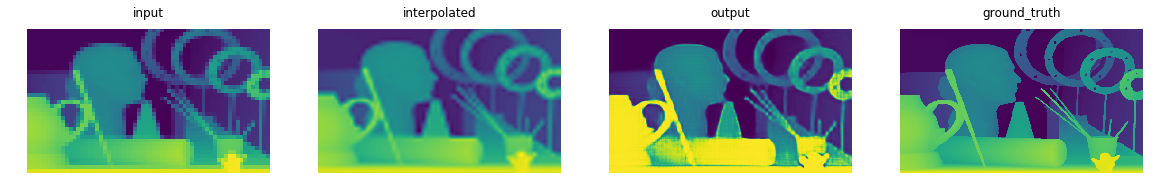

In [52]:
import os.path

for p in middle:
    phead,ptail = os.path.split(p)
    
    newp = phead + '/'
    print(newp)
    
    if 'pgm' in p:
        d = open_middlebury_disp(p, pfm = False)
    else:
        d = open_middlebury_disp(p)
        
    time_start = time.time()
    
    d_sm, d_big, interp, out = sess.run([t_image, t_target_image, t_interpolated, net_g_outputs],
                                  feed_dict={t_input:(d[None,...,None]), d_flg:False})
    print(time.time() - time_start)
    
    out_norm = norm_max(out[0,:,:,0])
    d_norm = norm_max(d_big[0,:,:,0])
    interp_norm = norm_max(interp[0,:,:,0])
    
    print(d_norm.shape, out_norm.shape)
    
    temp = (out_norm * 255).astype('uint8')
    temp2 = (d_norm * 255).astype('uint8')
    temp3 = (interp_norm * 255).astype('uint8')
    
    print(p[:-10])
    print('rmse = ', rmse_f(temp, temp2))
    print('ssim=', compare_ssim(d_norm, out_norm, data_range= 1))
    print('psnr = ',compare_psnr(out_norm, d_norm, data_range = 1))
            
    print(rmse_f(temp3,temp2))
    print(compare_ssim(interp_norm, d_norm, data_range=1))
    print(compare_psnr(interp_norm, d_norm, data_range = 1))
    
    fig, ax = plt.subplots(1,4,figsize = (20,20))
    ax[0].matshow(d_sm[0,:,:,0]), ax[0].set_title("input"), ax[0].axis('off') 
    ax[1].matshow(interp_norm), ax[1].set_title("interpolated"), ax[1].axis('off') 
    ax[2].matshow(out_norm), ax[2].set_title("output"), ax[2].axis('off') 
    ax[3].matshow(d_big[0,:,:,0]), ax[3].set_title("ground_truth"),ax[3].axis('off') 
    
    import imageio
    
    imageio.imwrite(newp+ 'nn.png', temp)

In [160]:
d_teddy = open_middlebury_disp(teddy, False)



(960, 1384) (960, 1384)


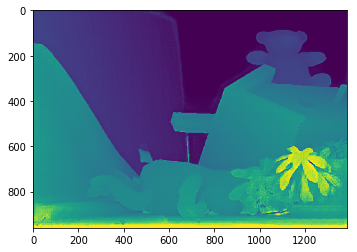

In [163]:
d = d_teddy
d_sm, d_big, interp, out = sess.run([t_image, t_target_image, t_interpolated, net_g_outputs],
                                  feed_dict={t_input:(d[None,...,None]), d_flg:False})


out_norm = norm_max(out[0,:,:,0])
d_norm = norm_max(d_big[0,:,:,0])
interp_norm = norm_max(interp[0,:,:,0])
    
print(d_norm.shape, out_norm.shape)
    
temp = (out_norm * 255).astype('uint8')
temp2 = (d_norm * 255).astype('uint8')
temp3 = (interp_norm * 255).astype('uint8')

plt.imshow(out_norm)

x1, x2, y1, y2 = 0, 500, 0, 400 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
axins.axis('off')

In [158]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

(0.0, 500.0, 0.0, 400.0)

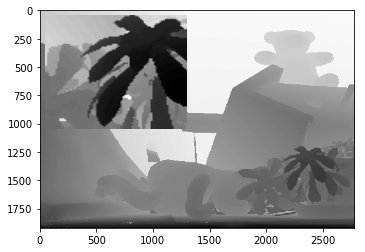

In [159]:
fig, ax = plt.subplots() # create a new figure with a default 111 subplot
ax.imshow(d_teddy, cmap=cm.gray_r)
axins = zoomed_inset_axes(ax, 2.5, loc=2) # zoom-factor: 2.5, location: upper-left
#axins.matshow(d_teddy[1200:-1,2000:-1], cmap=cm.gray_r)

patch = d_teddy[1000:1600,2000:2500]
axins.imshow(patch[::-1], cmap=cm.gray_r)

x1, x2, y1, y2 = 0, 500, 0, 400 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
axins.axis('off')

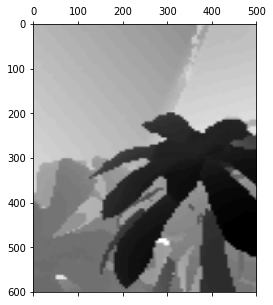

In [150]:
plt.matshow(patch,cmap=cm.gray_r)